In [2]:
import pandas as pd
import numpy as np
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
health = pd.read_csv('data/FINAL_cleaned_trainingdata.csv')
health = health.set_index('person_id_syn')

In [3]:
health.shape

(69572, 74)

In [4]:
Y = health['transportation_issues']
X = health.drop('transportation_issues', axis = 1)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_holdout_test, y_train, y_holdout_test = train_test_split(X, Y, test_size=0.25)

In [6]:
xgbs = XGBClassifier(n_estimators=100,
                      max_depth = 2,
                      scale_pos_weight = 5.5, 
                      subsample = 0.6,
                      colsample_bytree = 0.8,
                      min_child_weight = 5,
                      eta = 0.2,
                      alpha = 0.01,
                      gamma = 2, 
                      reg_lambda = 4.5,
                     objective= 'binary:logistic', n_jobs =  -1,
                     eval_metric = 'auc')
model = xgbs.fit(X_train, y_train)
rf_predictions = model.predict(X_holdout_test)
rf_probs = model.predict_proba(X_holdout_test)[:, 1]
roc_value = roc_auc_score(y_holdout_test, rf_probs)
print(roc_value)
print(confusion_matrix(y_holdout_test, rf_predictions))
print(classification_report(y_holdout_test, rf_predictions))

0.7427050832724379
[[10827  4000]
 [  940  1626]]
              precision    recall  f1-score   support

           0       0.92      0.73      0.81     14827
           1       0.29      0.63      0.40      2566

    accuracy                           0.72     17393
   macro avg       0.60      0.68      0.61     17393
weighted avg       0.83      0.72      0.75     17393



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.751


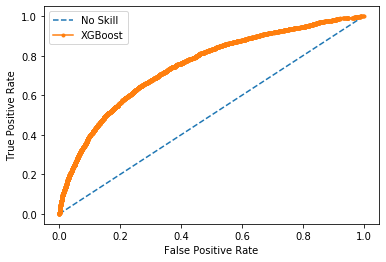

In [249]:
from sklearn.metrics import roc_curve
f = plt.figure()
ns_probs = [0 for _ in range(len(y_holdout_test))]
# calculate scores
ns_auc = roc_auc_score(y_holdout_test, ns_probs)
lr_auc = roc_auc_score(y_holdout_test, rf_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_holdout_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_holdout_test, rf_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
f.savefig('images/ROC_Curve.png', bbox_inches='tight', dpi=100)